# MNIST Image Classification with a Neural Network (PyTorch)


This notebook demonstrates the power of **PyTorch** and neural networks for image classification on the **MNIST dataset**. 
We will build a simple neural network to classify handwritten digits (0-9) from MNIST images. This example showcases 
how neural networks can learn patterns from raw image data and make accurate predictions.

The process involves:
1. Loading the MNIST dataset.
2. Defining a neural network model.
3. Training the model on the dataset.
4. Evaluating the model's accuracy.
5. Visualizing predictions to see the network's performance.

Let's get started!


In [1]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define transformations for the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST training and test datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


## Define the Neural Network Model

In [2]:

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Initialize the neural network, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


## Train the Model

In [3]:

# Training loop
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()               # Reset gradients
        outputs = model(images)             # Forward pass
        loss = criterion(outputs, labels)   # Calculate loss
        loss.backward()                     # Backpropagate
        optimizer.step()                    # Update weights

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader)}")


Epoch 1/5, Loss: 1.0904985992257783
Epoch 2/5, Loss: 0.3949735839324974
Epoch 3/5, Loss: 0.3286885799709032
Epoch 4/5, Loss: 0.2949009775591176
Epoch 5/5, Loss: 0.26941936072319556


## Evaluate the Model

In [4]:

# Evaluate the model on the test dataset
correct = 0
total = 0
with torch.no_grad():  # No need to calculate gradients during evaluation
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 92.55%


## Visualize Some Predictions

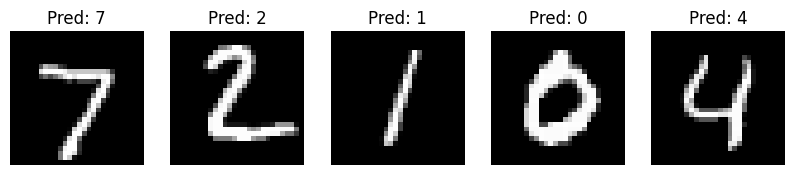

In [5]:
# Function to visualize predictions
def visualize_predictions():
    dataiter = iter(testloader)
    images, labels = next(dataiter)  # Use next(dataiter) instead of dataiter.next()
    
    # Get predictions
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    # Display images and predictions
    fig, axes = plt.subplots(1, 5, figsize=(10, 2))
    for i in range(5):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'Pred: {predicted[i].item()}')
        axes[i].axis('off')
    plt.show()

# Visualize predictions
visualize_predictions()



### Summary

In this notebook, we built a simple neural network with PyTorch to classify images from the MNIST dataset. 
We trained the model, evaluated its accuracy, and visualized some predictions. This example shows the power 
of neural networks in recognizing patterns in image data and highlights PyTorch's ease of use for building 
and training models.

Key takeaways:
- **Neural networks** can recognize patterns in complex data like images without manual feature engineering.
- **PyTorch** simplifies defining and training neural networks, allowing experimentation with different architectures.
- **Visualization** helps in understanding the model’s predictions and assessing its performance.

This is just a starting point; you can experiment further by adding more layers or using different architectures to improve accuracy.
